<a href="https://colab.research.google.com/github/soleme/daegu-ai-web3/blob/master/%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 19.0 MB/s 
     |████████████████████████████████| 86 kB 2.5 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
from konlpy.tag import Kkma
kkma = Kkma()

In [ ]:
kkma.sentences('네, 안녕하세요. 반갑습니다.')

['네, 안녕하세요.', '반갑습니다.']

In [ ]:
kkma.nouns('질문이나 건의 사항은 홈페이지의 고객센터에 남겨 주세요.')

['질문', '건의', '사항', '홈페이지', '고객', '고객센터', '센터']

In [ ]:
kkma.pos('오류보고는 실행환경, 에러메세지와함께 설명을 최대한상세히!^^')

[('오류', 'NNG'),
 ('보고', 'NNG'),
 ('는', 'JX'),
 ('실행', 'NNG'),
 ('환경', 'NNG'),
 (',', 'SP'),
 ('에러', 'NNG'),
 ('메세지', 'NNG'),
 ('와', 'JKM'),
 ('함께', 'MAG'),
 ('설명', 'NNG'),
 ('을', 'JKO'),
 ('최대한', 'NNG'),
 ('상세히', 'MAG'),
 ('!', 'SF'),
 ('^^', 'EMO')]

In [ ]:
from urllib.request import Request, urlopen
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import nltk 
from konlpy.tag import Kkma
from konlpy.tag import Twitter
from wordcloud import WordCloud

In [ ]:
date = '20211222'
news_url = 'https://news.naver.com/main/ranking/popularDay.nhn?date={}'.format(date)
req = Request(news_url, headers={'User-Agent': 'Mozilla/5.0'})
html = urlopen(req).read()

In [ ]:
html

b'\n\n\n\n\n\n\n\n<!DOCTYPE HTML>\n<html lang="ko">\n<head>\n    <meta charset="euc-kr">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="referrer" contents="always">\n    <meta http-equiv="refresh" content="600"/>\n    <meta name="viewport" content="width=1106"/>\n    <meta name="format-detection" content="telephone=no"/>\n    \r\n    \r\n    \r\n        \r\n            \r\n            \r\n            \r\n            \r\n            \r\n        \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n    \r\n\r\n<meta property="og:title"       content="\xb3\xd7\xc0\xcc\xb9\xf6 \xb4\xba\xbd\xba">\r\n<meta property="og:type"        content="website">\r\n<meta property="og:url"         content="https://news.naver.com/main/home.naver">\r\n<meta property="og:image"       content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png"/>\r\n<meta property="og:de

In [ ]:
soup = BeautifulSoup(html, 'html.parser')
soup


<!DOCTYPE HTML>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta contents="always" name="referrer"/>
<meta content="600" http-equiv="refresh">
<meta content="width=1106" name="viewport">
<meta content="telephone=no" name="format-detection">
<meta content="네이버 뉴스" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="https://news.naver.com/main/home.naver" property="og:url"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png" property="og:image">
<meta content="정치, 경제, 사회, 생활/문화, 세계, IT/과학 등 언론사별, 분야별 뉴스 기사 제공" property="og:description"/>
<meta content="네이버" property="og:article:author">
<meta content="summary" name="twitter:card"/>
<meta content="네이버 뉴스" name="twitter:title"/>
<meta content="네이버 뉴스" name="twitter:site"/>
<meta content="네이버 뉴스" name="twitter:creator"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x

In [ ]:
news_title = soup.select('div.rankingnews_box > ul > li > div > a')

In [ ]:
news_title

[<a class="list_title nclicks('RBP.rnknws')" href="/main/ranking/read.naver?mode=LSD&amp;mid=shm&amp;sid1=001&amp;oid=092&amp;aid=0002242962&amp;rankingType=RANKING">"갤럭시S22 울트라, 5번째 색상 '터키쉬 로즈' 추가"</a>,
 <a class="list_title nclicks('RBP.rnknws')" href="/main/ranking/read.naver?mode=LSD&amp;mid=shm&amp;sid1=001&amp;oid=092&amp;aid=0002242866&amp;rankingType=RANKING">빌 게이츠 "오미크론 변이, 3개월 안에 진정될 것"</a>,
 <a class="list_title nclicks('RBP.rnknws')" href="/main/ranking/read.naver?mode=LSD&amp;mid=shm&amp;sid1=001&amp;oid=092&amp;aid=0002242879&amp;rankingType=RANKING">대만 HTC, 韓 이어 中에서도 철수</a>,
 <a class="list_title nclicks('RBP.rnknws')" href="/main/ranking/read.naver?mode=LSD&amp;mid=shm&amp;sid1=001&amp;oid=092&amp;aid=0002242980&amp;rankingType=RANKING">중국, SK하이닉스 '인텔 낸드 인수' 승인</a>,
 <a class="list_title nclicks('RBP.rnknws')" href="/main/ranking/read.naver?mode=LSD&amp;mid=shm&amp;sid1=001&amp;oid=092&amp;aid=0002242992&amp;rankingType=RANKING">싸이월드 한컴타운, 허니제이와 크리스마스 이벤트</a>,
 <a class

In [ ]:
news_title[0].string

'"갤럭시S22 울트라, 5번째 색상 \'터키쉬 로즈\' 추가"'

In [ ]:
crawled_title = []
for title in news_title:
    crawled_title.append(title.string)
    print(title.string)

"갤럭시S22 울트라, 5번째 색상 '터키쉬 로즈' 추가"
빌 게이츠 "오미크론 변이, 3개월 안에 진정될 것"
대만 HTC, 韓 이어 中에서도 철수
중국, SK하이닉스 '인텔 낸드 인수' 승인
싸이월드 한컴타운, 허니제이와 크리스마스 이벤트
"입에 오미크론 처넣고 싶다" 트레이너 양치승 분노케한 인간
가수 양준일 탈세 의혹, 팬들이 직접 고발했다…무슨 일
“병상이 없대요, 우리 아빠 살려주세요” 22세 딸의 절규[편지전문]
김문기 동생 "억울하게 죽은 형, 이 나라 이 정권 다 원망스럽다"
"불륜 아니야?"···中고위직·인기 여배우 '재혼' 검색 차단 뒷말
이재명 "시장 때 김문기 몰랐다"더니···'함께 찍은 사진' 공개
文 퇴임 후 머물 '양산 사저' 모습 드러냈다···막바지 공사
인기 여배우 재혼 소식에 검색 차단···배우자 누구길래 中 정부 나섰나
"AZ 맞고 이상없던 삼촌, 부스터샷 하루만에 숨져"
부스터샷에 또 부스터샷···이스라엘, 세계 첫 '4차 접종' 시작
"상여금도 화끈하네"…최대 실적 낸 삼성, 전직원 200% 격려금 쏜다
민사고 출신 20대 여성…월가 사모펀드 핵인싸 됐다
"인기 여배우 재혼소식 검색 차단했다"…배우자 누구길래, 중국 정부까지 나섰나
“차명계좌로 포토북 주문 받아”…가수 양준일 팬들, 탈세 의혹 제기
"알바생이 다 사라졌다"…홍대 앞 롯데리아의 특별한 비밀
"가난하고 배운 게 없으면 자유 몰라" 윤석열 또 실언 논란
이재명 "김문기 사망, 납득 안 돼…대장동 정말 미치겠다"
김종인 중재 나섰지만…"이준석, 번복 쉽지 않을 것"
[단독] "래퍼 도끼, 보석업체에 4100여만 원 내야" 판결
80대가 몰던 승용차 돌진해 2명 사망…전동카트 폭발
"내달부터 식당·카페 입장시 방역패스 유효기간 지나면 경고음"
중년 배우, 마스크 착용해 달라는 택시기사에 '10분간 욕설' 논란
"이준석처럼 뛰쳐나갈 자들 줄 이을 것…선대위 판 새로 짜라" 野 중진의 경고
땅값 1위 '명동 네이처리퍼블릭'…표준주택 1위 '이명희 회장 자택'
"입에 

In [ ]:
crawled_title[1]

'빌 게이츠 "오미크론 변이, 3개월 안에 진정될 것"'

In [ ]:
title = "".join(crawled_title)

In [ ]:
title

'"갤럭시S22 울트라, 5번째 색상 \'터키쉬 로즈\' 추가"빌 게이츠 "오미크론 변이, 3개월 안에 진정될 것"대만 HTC, 韓 이어 中에서도 철수중국, SK하이닉스 \'인텔 낸드 인수\' 승인싸이월드 한컴타운, 허니제이와 크리스마스 이벤트"입에 오미크론 처넣고 싶다" 트레이너 양치승 분노케한 인간가수 양준일 탈세 의혹, 팬들이 직접 고발했다…무슨 일“병상이 없대요, 우리 아빠 살려주세요” 22세 딸의 절규[편지전문]김문기 동생 "억울하게 죽은 형, 이 나라 이 정권 다 원망스럽다""불륜 아니야?"···中고위직·인기 여배우 \'재혼\' 검색 차단 뒷말이재명 "시장 때 김문기 몰랐다"더니···\'함께 찍은 사진\' 공개文 퇴임 후 머물 \'양산 사저\' 모습 드러냈다···막바지 공사인기 여배우 재혼 소식에 검색 차단···배우자 누구길래 中 정부 나섰나"AZ 맞고 이상없던 삼촌, 부스터샷 하루만에 숨져"부스터샷에 또 부스터샷···이스라엘, 세계 첫 \'4차 접종\' 시작"상여금도 화끈하네"…최대 실적 낸 삼성, 전직원 200% 격려금 쏜다민사고 출신 20대 여성…월가 사모펀드 핵인싸 됐다"인기 여배우 재혼소식 검색 차단했다"…배우자 누구길래, 중국 정부까지 나섰나“차명계좌로 포토북 주문 받아”…가수 양준일 팬들, 탈세 의혹 제기"알바생이 다 사라졌다"…홍대 앞 롯데리아의 특별한 비밀"가난하고 배운 게 없으면 자유 몰라" 윤석열 또 실언 논란이재명 "김문기 사망, 납득 안 돼…대장동 정말 미치겠다"김종인 중재 나섰지만…"이준석, 번복 쉽지 않을 것"[단독] "래퍼 도끼, 보석업체에 4100여만 원 내야" 판결80대가 몰던 승용차 돌진해 2명 사망…전동카트 폭발"내달부터 식당·카페 입장시 방역패스 유효기간 지나면 경고음"중년 배우, 마스크 착용해 달라는 택시기사에 \'10분간 욕설\' 논란"이준석처럼 뛰쳐나갈 자들 줄 이을 것…선대위 판 새로 짜라" 野 중진의 경고땅값 1위 \'명동 네이처리퍼블릭\'…표준주택 1위 \'이명희 회장 자택\'"입에 오미크론 처넣고 싶

In [ ]:
filtered_title = title.replace('.', ' ').replace('"',' ').replace(',',' ').replace("'"," ").replace('·', ' ').replace('=',' ').replace('\n',' ').replace('?',' ').replace('…',' ')
filtered_title

' 갤럭시S22 울트라  5번째 색상  터키쉬 로즈  추가 빌 게이츠  오미크론 변이  3개월 안에 진정될 것 대만 HTC  韓 이어 中에서도 철수중국  SK하이닉스  인텔 낸드 인수  승인싸이월드 한컴타운  허니제이와 크리스마스 이벤트 입에 오미크론 처넣고 싶다  트레이너 양치승 분노케한 인간가수 양준일 탈세 의혹  팬들이 직접 고발했다 무슨 일“병상이 없대요  우리 아빠 살려주세요” 22세 딸의 절규[편지전문]김문기 동생  억울하게 죽은 형  이 나라 이 정권 다 원망스럽다  불륜 아니야     中고위직 인기 여배우  재혼  검색 차단 뒷말이재명  시장 때 김문기 몰랐다 더니    함께 찍은 사진  공개文 퇴임 후 머물  양산 사저  모습 드러냈다   막바지 공사인기 여배우 재혼 소식에 검색 차단   배우자 누구길래 中 정부 나섰나 AZ 맞고 이상없던 삼촌  부스터샷 하루만에 숨져 부스터샷에 또 부스터샷   이스라엘  세계 첫  4차 접종  시작 상여금도 화끈하네  최대 실적 낸 삼성  전직원 200% 격려금 쏜다민사고 출신 20대 여성 월가 사모펀드 핵인싸 됐다 인기 여배우 재혼소식 검색 차단했다  배우자 누구길래  중국 정부까지 나섰나“차명계좌로 포토북 주문 받아” 가수 양준일 팬들  탈세 의혹 제기 알바생이 다 사라졌다  홍대 앞 롯데리아의 특별한 비밀 가난하고 배운 게 없으면 자유 몰라  윤석열 또 실언 논란이재명  김문기 사망  납득 안 돼 대장동 정말 미치겠다 김종인 중재 나섰지만  이준석  번복 쉽지 않을 것 [단독]  래퍼 도끼  보석업체에 4100여만 원 내야  판결80대가 몰던 승용차 돌진해 2명 사망 전동카트 폭발 내달부터 식당 카페 입장시 방역패스 유효기간 지나면 경고음 중년 배우  마스크 착용해 달라는 택시기사에  10분간 욕설  논란 이준석처럼 뛰쳐나갈 자들 줄 이을 것 선대위 판 새로 짜라  野 중진의 경고땅값 1위  명동 네이처리퍼블릭  표준주택 1위  이명희 회장 자택  입에 오미크론 처넣고 싶다   양치승  대출 사기 문자에

In [ ]:
tw = Twitter()

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [ ]:
tokens_ko = tw.nouns(filtered_title)
tokens_ko

['갤럭시',
 '울트라',
 '색상',
 '터키',
 '쉬',
 '로',
 '추가',
 '게이츠',
 '오미크론',
 '변',
 '개월',
 '안',
 '진정',
 '것',
 '대만',
 '철수',
 '중국',
 '하이닉스',
 '인텔',
 '낸드',
 '인수',
 '승인',
 '싸이월드',
 '한컴',
 '타운',
 '허니',
 '제이',
 '크리스마스',
 '이벤트',
 '입',
 '오미크론',
 '처',
 '트레이너',
 '양치',
 '승',
 '분노케',
 '인간',
 '가수',
 '양준',
 '일',
 '탈세',
 '의혹',
 '팬',
 '직접',
 '고발',
 '무슨',
 '일',
 '병상',
 '대요',
 '우리',
 '아빠',
 '세',
 '딸',
 '절규',
 '편지',
 '전문',
 '김문기',
 '동생',
 '형',
 '이',
 '나라',
 '이',
 '정권',
 '원망',
 '불륜',
 '고위',
 '직',
 '인기',
 '여배우',
 '재혼',
 '검색',
 '차단',
 '뒷말',
 '이재명',
 '시장',
 '때',
 '김문기',
 '더니',
 '사진',
 '공개',
 '퇴임',
 '후',
 '양산',
 '저',
 '모습',
 '막바지',
 '공사',
 '인기',
 '여배우',
 '재혼',
 '소식',
 '검색',
 '차단',
 '배우자',
 '누구',
 '길',
 '정부',
 '이상',
 '삼촌',
 '부스터',
 '샷',
 '하루',
 '부스터',
 '샷',
 '또',
 '부스터',
 '샷',
 '이스라엘',
 '세계',
 '첫',
 '차',
 '접종',
 '시작',
 '상여금',
 '최대',
 '실적',
 '삼성',
 '직원',
 '격려',
 '금',
 '쏜다',
 '민사고',
 '출신',
 '여성',
 '월',
 '사모펀드',
 '핵인',
 '인기',
 '여배우',
 '재혼',
 '소식',
 '검색',
 '차단',
 '배우자',
 '누구',
 '길',
 '중국',
 '정부',
 '차명계좌',
 '포토북',
 '주문',
 '가수

In [ ]:
ko = nltk.Text(tokens_ko, name='기사 내 명사')
ko.tokens

['갤럭시',
 '울트라',
 '색상',
 '터키',
 '쉬',
 '로',
 '추가',
 '게이츠',
 '오미크론',
 '변',
 '개월',
 '안',
 '진정',
 '것',
 '대만',
 '철수',
 '중국',
 '하이닉스',
 '인텔',
 '낸드',
 '인수',
 '승인',
 '싸이월드',
 '한컴',
 '타운',
 '허니',
 '제이',
 '크리스마스',
 '이벤트',
 '입',
 '오미크론',
 '처',
 '트레이너',
 '양치',
 '승',
 '분노케',
 '인간',
 '가수',
 '양준',
 '일',
 '탈세',
 '의혹',
 '팬',
 '직접',
 '고발',
 '무슨',
 '일',
 '병상',
 '대요',
 '우리',
 '아빠',
 '세',
 '딸',
 '절규',
 '편지',
 '전문',
 '김문기',
 '동생',
 '형',
 '이',
 '나라',
 '이',
 '정권',
 '원망',
 '불륜',
 '고위',
 '직',
 '인기',
 '여배우',
 '재혼',
 '검색',
 '차단',
 '뒷말',
 '이재명',
 '시장',
 '때',
 '김문기',
 '더니',
 '사진',
 '공개',
 '퇴임',
 '후',
 '양산',
 '저',
 '모습',
 '막바지',
 '공사',
 '인기',
 '여배우',
 '재혼',
 '소식',
 '검색',
 '차단',
 '배우자',
 '누구',
 '길',
 '정부',
 '이상',
 '삼촌',
 '부스터',
 '샷',
 '하루',
 '부스터',
 '샷',
 '또',
 '부스터',
 '샷',
 '이스라엘',
 '세계',
 '첫',
 '차',
 '접종',
 '시작',
 '상여금',
 '최대',
 '실적',
 '삼성',
 '직원',
 '격려',
 '금',
 '쏜다',
 '민사고',
 '출신',
 '여성',
 '월',
 '사모펀드',
 '핵인',
 '인기',
 '여배우',
 '재혼',
 '소식',
 '검색',
 '차단',
 '배우자',
 '누구',
 '길',
 '중국',
 '정부',
 '차명계좌',
 '포토북',
 '주문',
 '가수

In [ ]:
ko.vocab()

FreqDist({'갤럭시': 1,
          '울트라': 1,
          '색상': 2,
          '터키': 1,
          '쉬': 1,
          '로': 5,
          '추가': 2,
          '게이츠': 1,
          '오미크론': 7,
          '변': 1,
          '개월': 7,
          '안': 7,
          '진정': 1,
          '것': 10,
          '대만': 2,
          '철수': 1,
          '중국': 5,
          '하이닉스': 4,
          '인텔': 4,
          '낸드': 4,
          '인수': 3,
          '승인': 7,
          '싸이월드': 2,
          '한컴': 1,
          '타운': 1,
          '허니': 1,
          '제이': 1,
          '크리스마스': 2,
          '이벤트': 2,
          '입': 4,
          '처': 5,
          '트레이너': 1,
          '양치': 4,
          '승': 4,
          '분노케': 1,
          '인간': 2,
          '가수': 2,
          '양준': 2,
          '일': 7,
          '탈세': 2,
          '의혹': 7,
          '팬': 2,
          '직접': 2,
          '고발': 4,
          '무슨': 2,
          '병상': 2,
          '대요': 1,
          '우리': 3,
          '아빠': 1,
          '세': 6,
          '딸': 4,
          '절규': 1,
       

In [ ]:
new_ko=[]
for word in ko:
  if len(word) > 1 and word != '단독' and  word != ' ':
        new_ko.append(word)
new_ko

['갤럭시',
 '울트라',
 '색상',
 '터키',
 '추가',
 '게이츠',
 '오미크론',
 '개월',
 '진정',
 '대만',
 '철수',
 '중국',
 '하이닉스',
 '인텔',
 '낸드',
 '인수',
 '승인',
 '싸이월드',
 '한컴',
 '타운',
 '허니',
 '제이',
 '크리스마스',
 '이벤트',
 '오미크론',
 '트레이너',
 '양치',
 '분노케',
 '인간',
 '가수',
 '양준',
 '탈세',
 '의혹',
 '직접',
 '고발',
 '무슨',
 '병상',
 '대요',
 '우리',
 '아빠',
 '절규',
 '편지',
 '전문',
 '김문기',
 '동생',
 '나라',
 '정권',
 '원망',
 '불륜',
 '고위',
 '인기',
 '여배우',
 '재혼',
 '검색',
 '차단',
 '뒷말',
 '이재명',
 '시장',
 '김문기',
 '더니',
 '사진',
 '공개',
 '퇴임',
 '양산',
 '모습',
 '막바지',
 '공사',
 '인기',
 '여배우',
 '재혼',
 '소식',
 '검색',
 '차단',
 '배우자',
 '누구',
 '정부',
 '이상',
 '삼촌',
 '부스터',
 '하루',
 '부스터',
 '부스터',
 '이스라엘',
 '세계',
 '접종',
 '시작',
 '상여금',
 '최대',
 '실적',
 '삼성',
 '직원',
 '격려',
 '쏜다',
 '민사고',
 '출신',
 '여성',
 '사모펀드',
 '핵인',
 '인기',
 '여배우',
 '재혼',
 '소식',
 '검색',
 '차단',
 '배우자',
 '누구',
 '중국',
 '정부',
 '차명계좌',
 '포토북',
 '주문',
 '가수',
 '양준',
 '탈세',
 '의혹',
 '제기',
 '알바생',
 '홍대',
 '롯데리아',
 '비밀',
 '자유',
 '윤석열',
 '실언',
 '논란',
 '이재명',
 '김문기',
 '사망',
 '납득',
 '대장동',
 '정말',
 '김종인',
 '중재',
 '이준석',
 '번복',
 '래퍼',
 '도끼',


In [ ]:
ko = nltk.Text(new_ko, name = '기사 내 명사 두 번째')
ko.tokens
ko.vocab()

FreqDist({'갤럭시': 1,
          '울트라': 1,
          '색상': 2,
          '터키': 1,
          '추가': 2,
          '게이츠': 1,
          '오미크론': 7,
          '개월': 7,
          '진정': 1,
          '대만': 2,
          '철수': 1,
          '중국': 5,
          '하이닉스': 4,
          '인텔': 4,
          '낸드': 4,
          '인수': 3,
          '승인': 7,
          '싸이월드': 2,
          '한컴': 1,
          '타운': 1,
          '허니': 1,
          '제이': 1,
          '크리스마스': 2,
          '이벤트': 2,
          '트레이너': 1,
          '양치': 4,
          '분노케': 1,
          '인간': 2,
          '가수': 2,
          '양준': 2,
          '탈세': 2,
          '의혹': 7,
          '직접': 2,
          '고발': 4,
          '무슨': 2,
          '병상': 2,
          '대요': 1,
          '우리': 3,
          '아빠': 1,
          '절규': 1,
          '편지': 1,
          '전문': 1,
          '김문기': 16,
          '동생': 1,
          '나라': 2,
          '정권': 3,
          '원망': 1,
          '불륜': 2,
          '고위': 1,
          '인기': 4,
          '여배우': 4,
          '재

In [ ]:
data = ko.vocab().most_common(50)
data = dict(data)
data

{'개월': 7,
 '거리': 7,
 '겨울': 5,
 '극빈': 6,
 '김건희': 8,
 '김문기': 16,
 '김종인': 14,
 '내년': 8,
 '논란': 12,
 '대위': 9,
 '대장동': 9,
 '대통령': 6,
 '모습': 5,
 '몰던': 5,
 '발언': 5,
 '방역': 10,
 '백신': 10,
 '사람': 11,
 '사망': 8,
 '사진': 5,
 '삼성': 14,
 '손녀': 5,
 '승인': 7,
 '시장': 7,
 '실언': 5,
 '아들': 5,
 '언론': 5,
 '업자': 8,
 '영부인': 5,
 '영상': 7,
 '영업': 5,
 '오미크론': 7,
 '위반': 8,
 '유엔': 5,
 '유족': 5,
 '윤석열': 34,
 '윤핵관': 5,
 '의혹': 7,
 '이재명': 14,
 '이준석': 15,
 '자영': 8,
 '자유': 23,
 '전자': 8,
 '접종': 9,
 '정부': 5,
 '중국': 5,
 '코로나': 11,
 '특별': 5,
 '패스': 8,
 '할머니': 7}

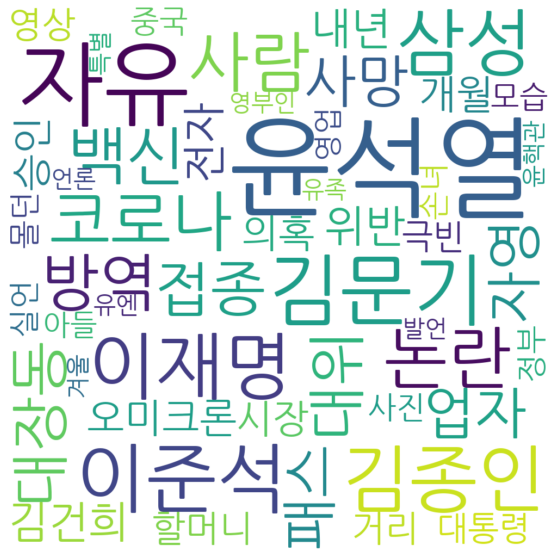

In [ ]:
font = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

wc = WordCloud(font_path=font, background_color="white", width=1000, height=1000, max_words=50, max_font_size=200)
wc = wc.generate_from_frequencies(data)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

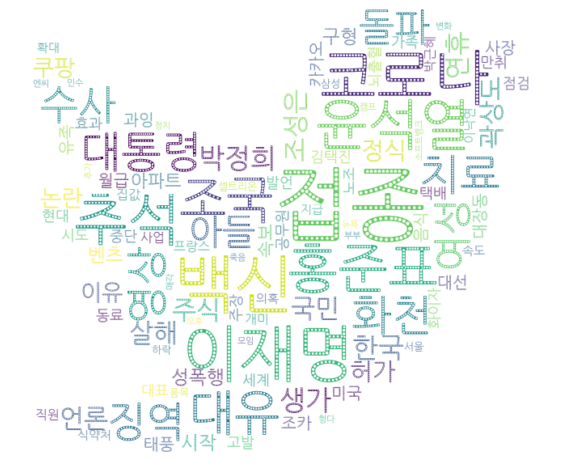

In [ ]:
import numpy as np
from PIL import Image
custom_mask = np.array(Image.open('image.png'))

font = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'

wc = WordCloud(font_path=font, background_color="white", mask=custom_mask, width=500, height=500, max_words=100, max_font_size=100)
wc = wc.generate_from_frequencies(data)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()